Chapter 12

# 椭圆视角看主成分分析
《线性代数》 | 鸢尾花书：数学不难

这段代码从数学角度展示了**二维高斯分布样本的生成、马氏距离的等高线图绘制、数据中心化、协方差矩阵特征值分解、以及在不同方向上的线性投影效果**，结合可视化，揭示主成分分析（PCA）背后的核心思想。下面分段讲解代码背后的数学逻辑：

---

$数据生成$  
代码首先从二维高斯分布中采样 $300$ 个样本点，均值向量为 $\mu = [4, 3]$，协方差矩阵为  
$$
\Sigma = \begin{bmatrix} 1 & 0.5 \\ 0.5 & 1 \end{bmatrix}
$$  
生成的数据服从 $X \sim \mathcal{N}(\mu, \Sigma)$，即一个形状为椭圆的二维正态分布数据云。变量 `data` 存储的是这些二维样本。

---

$马氏距离计算$  
接着定义了一个函数用于计算马氏距离。马氏距离度量的是一个点 $x$ 到中心 $\mu$ 的距离，考虑了变量之间的协方差结构，其定义为：  
$$
D_M(x) = \sqrt{(x - \mu)^T \Sigma^{-1} (x - \mu)}
$$  
代码中通过 `cov_inv = np.linalg.inv(cov)` 计算协方差矩阵的逆，然后对网格上的每一个点计算其到中心点的马氏距离，并绘制等高线。等高线为马氏距离的等值线，表示距离中心 $\mu$ 相同的点组成的集合，这在二维空间下形成的是一组椭圆线，形状由 $\Sigma$ 决定。

---

$二维数据与马氏距离可视化$  
在第一个图中，绘制了：
- 马氏距离的等高线（以 $\mu$ 为中心）
- 实际生成的数据点（黑色圆点）
- 中心点横纵坐标线（以 $\mu$ 为交点）

这一步展现的是数据分布在原坐标系下的几何特征，特别是协方差矩阵决定的“椭圆形状”。

---

$中心化$  
通过将原始数据减去其均值 $\mu$，实现了数据的中心化：  
$$
X_c = X - \mu
$$  
这一步在几何上相当于将整个数据云平移，使其质心移动到原点 $(0,0)$。中心化不会改变数据的协方差结构和马氏距离等值线的形状。代码在新的图中重新绘制了中心化后的数据分布和马氏距离等高线，展示了“椭圆”如何围绕原点分布。

---

$协方差矩阵特征值分解$  
之后，代码对协方差矩阵 $\Sigma$ 进行特征值分解：  
$$
\Sigma = V \Lambda V^{-1}
$$  
其中：
- $V$ 是协方差矩阵的特征向量矩阵，每一列是一个方向向量
- $\Lambda$ 是对角矩阵，包含对应的特征值，反映每个方向的方差大小

这一步揭示了马氏距离等高线（椭圆）轴线的方向（特征向量）和长度（特征值）。

---

$在方向 v_1 上投影$  
代码定义一个角度为 $45^\circ$ 的单位向量 $v_1$：
$$
v_1 = \begin{bmatrix} \cos(\pi/4) \\ \sin(\pi/4) \end{bmatrix}
$$  
然后构造一个投影矩阵：
$$
T_1 = v_1 v_1^T
$$  
每个中心化样本 $x$ 投影到该方向上得到：
$$
z = x^T v_1
$$  
这是在该方向上进行一次线性投影的标准做法。最后将一维投影结果映射回二维平面，用于可视化投影点与原点的连线，从而展现数据在该方向的“压缩”效果。

---

$在方向 v_2 上投影$  
同理，第二部分定义了另一个方向 $v_2$，其角度为 $-45^\circ$，重复上述投影过程。这一步的目的是比较两个方向的投影效果，展示不同投影方向对数据压缩程度的影响。

---

$几何意义总结$  
整个代码组合在一起展现了主成分分析的核心思想：  
- 通过协方差矩阵 $\Sigma$ 获得数据主要变化方向（特征向量）
- 不同方向的投影会导致不同程度的信息保留
- 方向对应的特征值越大，说明该方向上的数据变化越大，投影效果越好

换句话说，主成分分析实际上寻找的是使数据投影后方差最大的方向，而马氏距离提供了一种自然的方式度量不同方向的数据“形状”。

## 初始化

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
from scipy.stats import multivariate_normal

## 创建二维数据

In [6]:
np.random.seed(0)
mean = [4, 3]
cov = [[1, 0.5], 
       [0.5, 1]]
data = np.random.multivariate_normal(mean, cov, 300)
cov_used = np.array(cov) 
# 注意，准确来说，cov_used应该通过data计算

## 马氏距离自定义函数

In [8]:
def mahalanobis_distance(x, mean, cov_inv):
    delta = x - mean
    return np.sqrt(np.dot(np.dot(delta, cov_inv), delta.T))

## 网格数据

In [10]:
x, y = np.meshgrid(
            np.linspace(0,10, 100),
            np.linspace(0,10, 100),)
pos = np.c_[x.ravel(), y.ravel()]

## 计算马氏距离

In [12]:
cov_inv = np.linalg.inv(cov_used)

Mahal_dd = np.diag((pos - mean) @ cov_inv @ (pos - mean).T)
Mahal_dd = np.sqrt(Mahal_dd)
Mahal_dd = np.reshape(Mahal_dd,x.shape)

## 可视化二维散点数据

[]

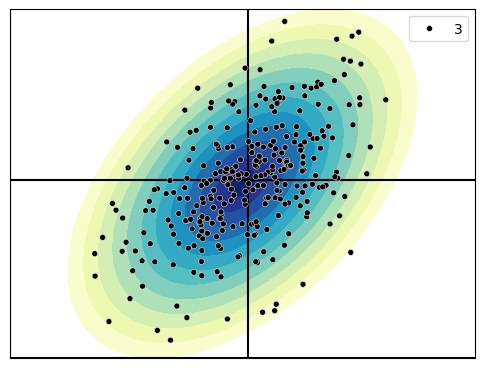

In [14]:
fig, ax = plt.subplots(figsize = (6,6))

# 绘制马氏距离等高线
plt.contourf(x, y, Mahal_dd, cmap='YlGnBu_r', levels=np.linspace(0,3,13))

# 绘制样本数据散点
ax = sns.scatterplot(x=data[:,0], y=data[:,1], 
                     marker = 'o', zorder = 1e3, 
                     color = 'k', size = 3)

ax.axvline(x = 0, c = 'k')
ax.axhline(y = 0, c = 'k')
ax.axvline(x = data[:,0].mean(), c = 'k')
ax.axhline(y = data[:,1].mean(), c = 'k')
ax.axis('scaled')
ax.set_xbound(lower = 0, upper = 8)
ax.set_ybound(lower = 0, upper = 6)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

## 中心化数据

In [16]:
Xc = data - mean

[]

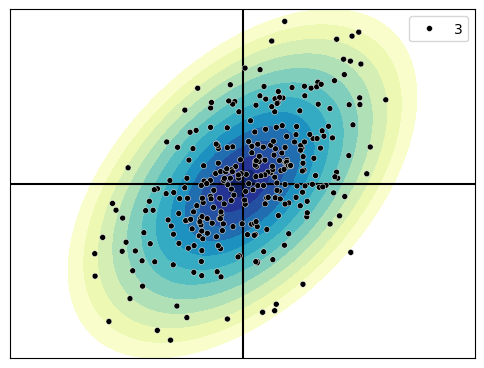

In [17]:
fig, ax = plt.subplots(figsize = (6,6))

# 绘制马氏距离等高线
plt.contourf(x-mean[0], y-mean[1], Mahal_dd, cmap='YlGnBu_r', levels=np.linspace(0,3,13))

# 绘制样本数据散点
ax = sns.scatterplot(x=Xc[:,0], y=Xc[:,1], 
                     marker = 'o', zorder = 1e3, 
                     color = 'k', size = 3)

ax.axvline(x = 0, c = 'k')
ax.axhline(y = 0, c = 'k')
ax.axvline(x = data[:,0].mean(), c = 'k')
ax.axhline(y = data[:,1].mean(), c = 'k')
ax.axis('scaled')
ax.set_xbound(lower = -4, upper = 4)
ax.set_ybound(lower = -3, upper = 3)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

## 特征值分解

In [19]:
eig_values, V = np.linalg.eig(cov)

In [20]:
eig_values

array([1.5, 0.5])

In [21]:
V

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [22]:
Lambda = np.diag(eig_values)
Lambda

array([[1.5, 0. ],
       [0. , 0.5]])

## 投影

In [24]:
theta = np.pi/4
v1 = np.array([[np.cos(theta)],
               [np.sin(theta)]])

T1 = v1@v1.T
z1_1D = Xc@v1
# 一次投影，得到投影点在v1向量上坐标

z1_2D = Xc@T1

[]

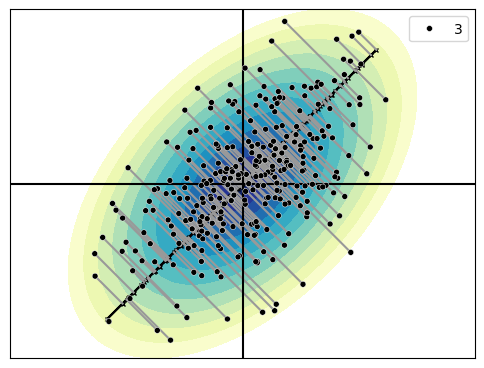

In [25]:
fig, ax = plt.subplots(figsize = (6,6))

# 绘制马氏距离等高线
plt.contourf(x-mean[0], y-mean[1], Mahal_dd, cmap='YlGnBu_r', levels=np.linspace(0,3,13))
# plt.contour(xx_maha, yy_maha, mahal_d_Xc, colors='k', levels=[1,2,3])

# 绘制样本数据散点
ax = sns.scatterplot(x=Xc[:,0], y=Xc[:,1], 
                     marker = 'o', zorder = 1e3, 
                     color = 'k', size = 3)

# 绘制投影点
plt.plot(z1_2D[:,0],z1_2D[:,1], marker = 'x', markersize = 3, color = 'k')

# 绘制原始数据、投影点之间的连线
plt.plot(([i for (i,j) in z1_2D], [i for (i,j) in Xc]),
         ([j for (i,j) in z1_2D], [j for (i,j) in Xc]),c=[0.6,0.6,0.6])

ax.axvline(x = 0, c = 'k')
ax.axhline(y = 0, c = 'k')
ax.axvline(x = data[:,0].mean(), c = 'k')
ax.axhline(y = data[:,1].mean(), c = 'k')
ax.axis('scaled')
ax.set_xbound(lower = -4, upper = 4)
ax.set_ybound(lower = -3, upper = 3)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

In [26]:
theta = -np.pi/4
v2 = np.array([[np.cos(theta)],
               [np.sin(theta)]])

T2 = v2@v2.T
z2_1D = Xc@v2
# 一次投影，得到投影点在v2向量上坐标

z2_2D = Xc@T2

[]

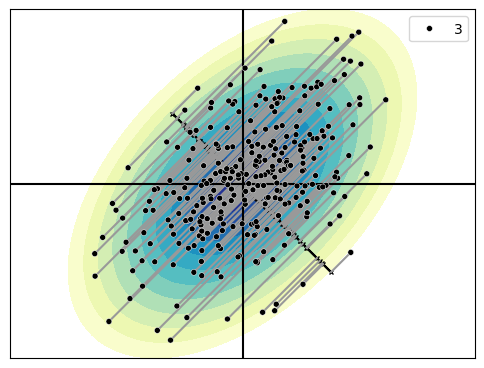

In [27]:
fig, ax = plt.subplots(figsize = (6,6))

# 绘制马氏距离等高线
plt.contourf(x-mean[0], y-mean[1], Mahal_dd, cmap='YlGnBu_r', levels=np.linspace(0,3,13))
# plt.contour(xx_maha, yy_maha, mahal_d_Xc, colors='k', levels=[1,2,3])

# 绘制样本数据散点
ax = sns.scatterplot(x=Xc[:,0], y=Xc[:,1], 
                     marker = 'o', zorder = 1e3, 
                     color = 'k', size = 3)

# 绘制投影点
plt.plot(z2_2D[:,0],z2_2D[:,1], marker = 'x', markersize = 3, color = 'k')

# 绘制原始数据、投影点之间的连线
plt.plot(([i for (i,j) in z2_2D], [i for (i,j) in Xc]),
         ([j for (i,j) in z2_2D], [j for (i,j) in Xc]),c=[0.6,0.6,0.6])

ax.axvline(x = 0, c = 'k')
ax.axhline(y = 0, c = 'k')
ax.axvline(x = data[:,0].mean(), c = 'k')
ax.axhline(y = data[:,1].mean(), c = 'k')
ax.axis('scaled')
ax.set_xbound(lower = -4, upper = 4)
ax.set_ybound(lower = -3, upper = 3)
ax.xaxis.set_ticks([])
ax.yaxis.set_ticks([])

作者	**生姜DrGinger**  
脚本	**生姜DrGinger**  
视频	**崔崔CuiCui**  
开源资源	[**GitHub**](https://github.com/Visualize-ML)  
平台	[**油管**](https://www.youtube.com/@DrGinger_Jiang)		
		[**iris小课堂**](https://space.bilibili.com/3546865719052873)		
		[**生姜DrGinger**](https://space.bilibili.com/513194466)  